In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.utils import class_weight

In [26]:
data= pd.read_csv('/Users/alonsosalcido/Desktop/Quantifying the World/case 7/final_project.csv')

In [27]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [28]:
data.shape

(160000, 51)

In [29]:
#Split Dataset into X and Y
x= data.iloc[:,:50]
y=data['y']

### Visualize Dependent Variable

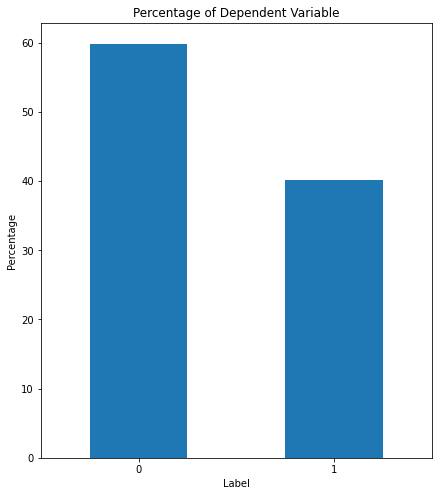

0    59.876875
1    40.123125
Name: y, dtype: float64


In [30]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = y.value_counts(normalize=True) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Dependent Variable')


# Display the plot
plt.show()
print(counts)

## Explore Variables

In [31]:
x.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
dtype: object

### Explore Categorical Variables

In [32]:
x['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

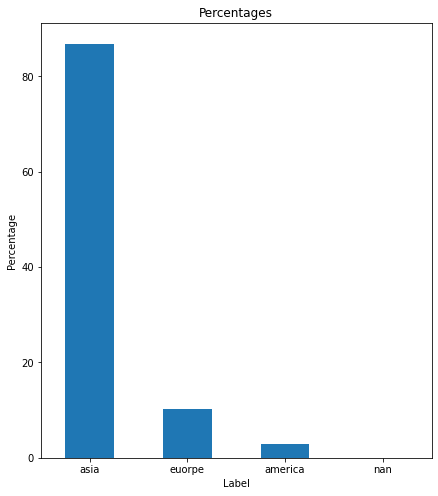

asia       86.853125
euorpe     10.336250
america     2.793125
NaN         0.017500
Name: x24, dtype: float64


In [33]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = x['x24'].value_counts(normalize=True, dropna=False) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Percentages')


# Display the plot
plt.show()
print(counts)

In [34]:
# Replace NaN values with mode
mode = x['x24'].mode().iloc[0]
x['x24'] = x['x24'].fillna(mode)

In [35]:
x['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

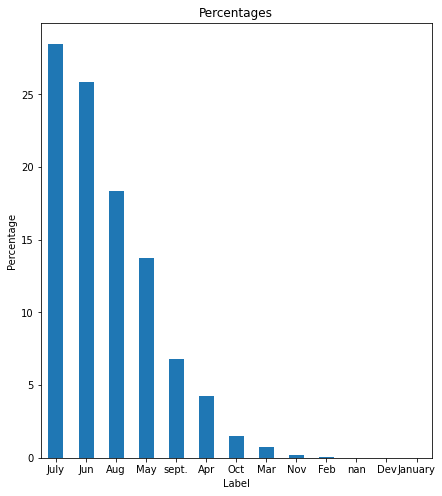

July       28.480625
Jun        25.830625
Aug        18.378750
May        13.711875
sept.       6.761875
Apr         4.225625
Oct         1.504375
Mar         0.769375
Nov         0.210625
Feb         0.087500
NaN         0.018750
Dev         0.014375
January     0.005625
Name: x29, dtype: float64


In [36]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = x['x29'].value_counts(normalize=True, dropna=False) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Percentages')


# Display the plot
plt.show()
print(counts)

In [37]:
# Replace NaN values with mode
mode = x['x29'].mode().iloc[0]
x['x29'] = x['x29'].fillna(mode)

In [38]:
x['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

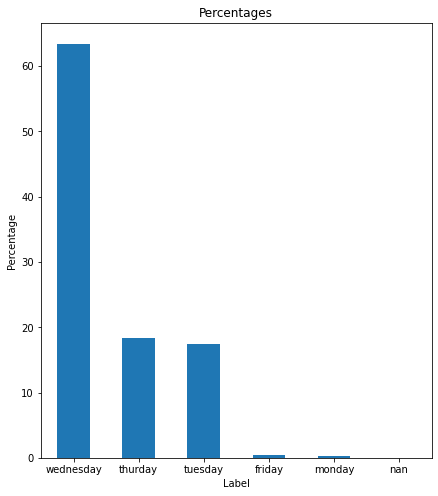

wednesday    63.459375
thurday      18.393125
tuesday      17.471250
friday        0.352500
monday        0.305000
NaN           0.018750
Name: x30, dtype: float64


In [39]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = x['x30'].value_counts(normalize=True, dropna=False) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Percentages')


# Display the plot
plt.show()
print(counts)

In [40]:
# Replace NaN values with mode
mode = x['x30'].mode().iloc[0]
x['x30'] = x['x30'].fillna(mode)

In [41]:
x['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [42]:
# Replace NaN values with mode
mode = x['x32'].mode().iloc[0]
x['x32'] = x['x32'].fillna(mode)

In [43]:
# 'x32' can be reformatted and used as Numerical
x['x32'] = x['x32'].str[:-1]
x['x32'] = x['x32'].astype(float)
x['x32'].head()

0    0.00
1   -0.02
2   -0.01
3    0.01
4    0.01
Name: x32, dtype: float64

In [44]:
data['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [45]:
# 'x37' can be reformatted and used as Numerical
x['x37'] = x['x37'].str[1:]
x['x37'] = x['x37'].astype(float)
x['x37'].head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64

### Create Dummy Variables on Categorical Variables

In [46]:
# Create dummy variables
x24 = pd.get_dummies(x['x24'])
x29 = pd.get_dummies(x['x29'])
x30 = pd.get_dummies(x['x30'])

In [47]:
# Drop categorical columns
x = x.drop(['x24', 'x29', 'x30'], axis=1)

# Combine Original df and Dummy Variables
bool_cols = pd.concat([x24, x29, x30], axis=1)
bool_cols.head()

,america,asia,euorpe,Apr,Aug,Dev,Feb,January,July,Jun,Mar,May,Nov,Oct,sept.,friday,monday,thurday,tuesday,wednesday
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [48]:
x.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x25    22
x26    36
x27    30
x28    35
x31    39
x32     0
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
dtype: int64

In [49]:
# Fill null values with the mean of each column
x = x.fillna(x.mean())
x.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x25    0
x26    0
x27    0
x28    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
dtype: int64

### 80/20 Split

In [50]:
%%time

# split data into training and testing sets 80/20
X_train_bool, X_test_bool, y_train, y_test = train_test_split(bool_cols, y, test_size=0.2, stratify=y, random_state=42)
X_train_non_bool, X_test_non_bool, _, _ = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

CPU times: user 182 ms, sys: 45.3 ms, total: 227 ms
Wall time: 233 ms


In [51]:
# create a StandardScaler object and fit on the non-boolean training set only
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_non_bool)

StandardScaler(with_mean=False)

In [52]:
# transform the non-boolean training and testing sets using the scaler
X_train_non_bool_scaled = scaler.transform(X_train_non_bool)
X_test_non_bool_scaled = scaler.transform(X_test_non_bool)

In [53]:
# concatenate scaled non-boolean columns and boolean columns along axis 1
X_train = np.hstack((X_train_non_bool_scaled, X_train_bool))
X_test = np.hstack((X_test_non_bool_scaled, X_test_bool))

## SDG Classifier

In [186]:
# Compute class weights
classes = [0, 1]
weights = compute_class_weight('balanced', classes=classes, y=y_train)

In [187]:
# Create SGDClassifier object with partial_fit method
clf = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42, alpha=.0001)

In [188]:
%%time
from sklearn.utils import shuffle
from tqdm import tqdm

# Set number of epochs and shuffle data before each epoch
num_epochs = 10
for epoch in range(num_epochs):
    X_train, y_train = shuffle(X_train, y_train, random_state=epoch)
    clf.partial_fit(X_train, y_train, classes=classes, sample_weight=weights[y_train])

CPU times: user 1.12 s, sys: 78 ms, total: 1.19 s
Wall time: 1.22 s


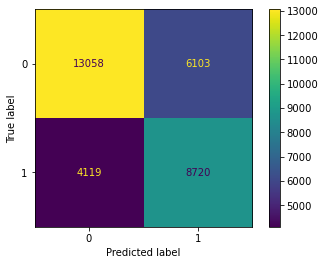

In [189]:
# Define the class labels as a list
class_labels = ['0', '1']

# Predict the classes on test data
preds = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [190]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     19161
           1       0.59      0.68      0.63     12839

    accuracy                           0.68     32000
   macro avg       0.67      0.68      0.67     32000
weighted avg       0.69      0.68      0.68     32000



## Neural Network Classifier

#### Balance Response Variable

In [54]:
# calculate class weights based on frequency of each class in training data
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# convert class weights to dictionary
class_weight_dict = dict(enumerate(class_weights))


In [55]:
# concatenate the x_train and x_test arrays along the first axis (rows)
X = np.concatenate((X_train, X_test), axis=0)

# concatenate the y_train and y_test arrays along the first axis (rows)
y = np.concatenate((y_train, y_test), axis=0)

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard
from time import time

tb = TensorBoard(log_dir=f"logs\\{time()}")

In [57]:
# Define Model Layers
model= tf.keras.Sequential()
model.add(tf.keras.Input(shape=(67,)))
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Define Early Stopping Parameters

from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor='loss', patience=1)

In [59]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 1.0295 - accuracy: 0.7989 - val_loss: 0.8224 - val_accuracy: 0.8726
Epoch 2/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.6954 - accuracy: 0.8999 - val_loss: 0.5961 - val_accuracy: 0.9168
Epoch 3/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.5223 - accuracy: 0.9277 - val_loss: 0.4797 - val_accuracy: 0.9272
Epoch 4/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.4149 - accuracy: 0.9396 - val_loss: 0.3804 - val_accuracy: 0.9416
Epoch 5/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.3444 - accuracy: 0.9451 - val_loss: 0.3283 - val_accuracy: 0.9429
Epoch 6/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.2954 - accuracy: 0.9498 - val_loss: 0.3200 - val_accuracy: 0.9330
Epoch 7/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.2594 - accuracy: 0.9532 - val_loss: 0

In [60]:
# make predictions on the test set
y_pred = model.predict(X_test)
# convert the predictions to binary (0 or 1)
y_pred = np.round(y_pred).astype(int)

1000/1000 [==============================] - 1s 1ms/step


1000/1000 [==============================] - 1s 1ms/step


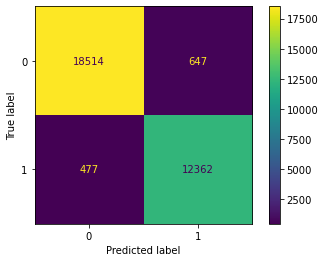

In [61]:
# Define the class labels as a list
class_labels = ['0', '1']

# Predict the classes on test data
preds = model.predict(X_test)
preds = np.round(y_pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [62]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.96      0.96     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.97      0.96      0.96     32000



In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_predict, KFold

# define your Keras model
def create_model():
    model = Sequential()
    # add layers to the model
    return model

# create an instance of the KerasClassifier wrapper
estimator = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# get fold predictions
fold_preds = cross_val_predict(estimator, X, y, cv=kfold)

In [200]:
# Loop over the folds
fold_scores = []
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print(f"Fold {fold+1}")
    
    # Split the data for this fold
    X_train_fold, y_train_fold = X[train_idx], y[train_idx]
    X_test_fold, y_test_fold = X[test_idx], y[test_idx]
    
    # Fit the model on the training data for this fold
    model.fit(X_train_fold, y_train_fold, epochs=1000, validation_data=(X_test_fold, y_test_fold), batch_size=15, callbacks=[tb, safety])
    
    # Evaluate the model on the test data for this fold
    scores = model.evaluate(X_test_fold, y_test_fold)
    fold_scores.append(scores)
    
# Calculate the mean and standard deviation of the fold scores
fold_scores = np.array(fold_scores)

Fold 1
Epoch 1/1000
8534/8534 [==============================] - 26s 3ms/step - loss: 1.0580 - accuracy: 0.7727 - val_loss: 0.8017 - val_accuracy: 0.8807
Epoch 2/1000
8534/8534 [==============================] - 27s 3ms/step - loss: 0.6840 - accuracy: 0.9030 - val_loss: 0.5802 - val_accuracy: 0.9196
Epoch 3/1000
8534/8534 [==============================] - 22s 3ms/step - loss: 0.5147 - accuracy: 0.9288 - val_loss: 0.4596 - val_accuracy: 0.9330
Epoch 4/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.4094 - accuracy: 0.9402 - val_loss: 0.3592 - val_accuracy: 0.9477
Epoch 5/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4119 - accuracy: 0.9067
Fold 2
Epoch 1/1000
8534/8534 [==============================] - 22s 3ms/step - loss: 0.2908 - accuracy: 0.9502 - val_loss: 0.2760 - val_accuracy: 0.9517
Epoch 2/1000
8534/8534 [==============================] - 23s 3ms/step - loss: 0.2556 - accuracy: 0.9537 - val_loss: 0.2426 - val_accuracy: 0.9550


In [227]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = np.round(y_pred)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 19s 2ms/step - loss: 1.0265 - accuracy: 0.7916
Epoch 2/1000
8534/8534 [==============================] - 22s 3ms/step - loss: 0.6748 - accuracy: 0.9043
Epoch 3/1000
8534/8534 [==============================] - 19s 2ms/step - loss: 0.5101 - accuracy: 0.9312
Epoch 4/1000
8534/8534 [==============================] - 18s 2ms/step - loss: 0.4084 - accuracy: 0.9406
Epoch 5/1000
8534/8534 [==============================] - 18s 2ms/step - loss: 0.3404 - accuracy: 0.9465
Epoch 6/1000
8534/8534 [==============================] - 18s 2ms/step - loss: 0.2929 - accuracy: 0.9506
Epoch 7/1000
8534/8534 [==============================] - 19s 2ms/step - loss: 0.2583 - accuracy: 0.9536
Epoch 8/1000
8534/8534 [==============================] - 18s 2ms/step - loss: 0.2332 - accuracy: 0.9565
Epoch 9/1000
8534/8534 [==============================] - 18s 2ms/step - loss: 0.2157 - accuracy: 0.9583
Epoch 10/1000
8534/8534 [==============================

In [239]:
conf_matrices

[array([[18690,   440],
        [  627, 12243]]),
 array([[18634,   371],
        [  884, 12111]]),
 array([[18714,   413],
        [  939, 11934]]),
 array([[18799,   523],
        [  547, 12131]]),
 array([[18864,   445],
        [  612, 12079]])]

In [257]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

Sum of False Positives: 2192
Dollar Value of False Positives: $76720


In [258]:
false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Sum of False Negatives: 3609
Dollar Value of False Positives: $54135


In [259]:
Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Dollar Value of Incorrect Predictions: $130855


### Reduce False Positives by Increasing Threshold to 0.6
#### False Positives have a higher dollar value than False Negatives

In [260]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > 0.6).astype(int)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 25s 3ms/step - loss: 0.1574 - accuracy: 0.9677
Epoch 2/1000
8534/8534 [==============================] - 22s 3ms/step - loss: 0.1567 - accuracy: 0.9680
Epoch 3/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1566 - accuracy: 0.9685
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 1:
[[18839   291]
 [  885 11985]]
Epoch 1/1000
8534/8534 [==============================] - 26s 3ms/step - loss: 0.1579 - accuracy: 0.9676
Epoch 2/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1572 - accuracy: 0.9681
Epoch 3/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1562 - accuracy: 0.9678
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 2:
[[18399   606]
 [  456 12539]]
Epoch 1/1000
8534/8534 [==============================] - 21s 3ms/step - loss: 0.1574 - accuracy: 0.9675
Epoch

In [261]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Sum of False Positives: 4359
Dollar Value of False Positives: $152565
Sum of False Negatives: 2334
Dollar Value of False Positives: $35010
Dollar Value of Incorrect Predictions: $187575


In [262]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > 0.3).astype(int)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 24s 3ms/step - loss: 0.1568 - accuracy: 0.9679
Epoch 2/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1556 - accuracy: 0.9687
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 1:
[[18807   323]
 [  908 11962]]
Epoch 1/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1571 - accuracy: 0.9678
Epoch 2/1000
8534/8534 [==============================] - 23s 3ms/step - loss: 0.1561 - accuracy: 0.9686
Epoch 3/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1556 - accuracy: 0.9688
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 2:
[[18524   481]
 [  598 12397]]
Epoch 1/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1560 - accuracy: 0.9683
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 3:
[[18409   7

In [263]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Sum of False Positives: 2847
Dollar Value of False Positives: $99645
Sum of False Negatives: 2551
Dollar Value of False Positives: $38265
Dollar Value of Incorrect Predictions: $137910


In [264]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > 0.4).astype(int)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 25s 3ms/step - loss: 0.1560 - accuracy: 0.9681
Epoch 2/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1559 - accuracy: 0.9682
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 1:
[[18197   933]
 [  286 12584]]
Epoch 1/1000
8534/8534 [==============================] - 26s 3ms/step - loss: 0.1565 - accuracy: 0.9683
Epoch 2/1000
8534/8534 [==============================] - 27s 3ms/step - loss: 0.1556 - accuracy: 0.9681
Epoch 3/1000
8534/8534 [==============================] - 26s 3ms/step - loss: 0.1555 - accuracy: 0.9684
Epoch 4/1000
1000/1000 [==============================] - 2s 2ms/step
Confusion matrix for fold 2:
[[18280   725]
 [  313 12682]]
Epoch 1/1000
8534/8534 [==============================] - 25s 3ms/step - loss: 0.1560 - accuracy: 0.9678
Epoch 2/1000
8534/8534 [==============================] - 22s 3ms/step - loss: 0.1555 - accuracy: 0.9685
Epoch

In [265]:
conf_matrices

[array([[18197,   933],
        [  286, 12584]]),
 array([[18280,   725],
        [  313, 12682]]),
 array([[18794,   333],
        [  687, 12186]]),
 array([[18452,   870],
        [  237, 12441]]),
 array([[18504,   805],
        [  358, 12333]])]

In [266]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Sum of False Positives: 3666
Dollar Value of False Positives: $128310
Sum of False Negatives: 1881
Dollar Value of False Positives: $28215
Dollar Value of Incorrect Predictions: $156525


In [267]:
# Define Early Stopping Parameters

from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor='accuracy', patience=1)

In [268]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = np.round(y_pred)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1555 - accuracy: 0.9681
Epoch 2/1000
8534/8534 [==============================] - 19s 2ms/step - loss: 0.1548 - accuracy: 0.9688
Epoch 3/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1549 - accuracy: 0.9689
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 1:
[[18646   484]
 [  561 12309]]
Epoch 1/1000
8534/8534 [==============================] - 30s 4ms/step - loss: 0.1563 - accuracy: 0.9683
Epoch 2/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1552 - accuracy: 0.9686
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 2:
[[18269   736]
 [  276 12719]]
Epoch 1/1000
8534/8534 [==============================] - 25s 3ms/step - loss: 0.1557 - accuracy: 0.9686
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 3:
[[18656   4

In [269]:
conf_matrices

[array([[18646,   484],
        [  561, 12309]]),
 array([[18269,   736],
        [  276, 12719]]),
 array([[18656,   471],
        [  478, 12395]]),
 array([[18845,   477],
        [  486, 12192]]),
 array([[18662,   647],
        [  352, 12339]])]

In [270]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Sum of False Positives: 2815
Dollar Value of False Positives: $98525
Sum of False Negatives: 2153
Dollar Value of False Positives: $32295
Dollar Value of Incorrect Predictions: $130820


In [271]:
# define the number of folds
num_folds = 5

# define the cross-validation strategy
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# create an empty list to store the confusion matrices
conf_matrices = []

# loop over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    # get the training and validation data for this fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train, epochs=1000, batch_size=15, callbacks=[tb, safety], class_weight=class_weight_dict)
    # make predictions on the validation data for this fold
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > 0.7).astype(int)
    
    # calculate and print the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_val, y_pred_classes)
    print(f"Confusion matrix for fold {fold+1}:")
    print(conf_matrix)
    
    # add the confusion matrix to the list
    conf_matrices.append(conf_matrix)

Epoch 1/1000
8534/8534 [==============================] - 26s 3ms/step - loss: 0.1559 - accuracy: 0.9681
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 1:
[[19042    88]
 [ 1849 11021]]
Epoch 1/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1553 - accuracy: 0.9684
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 2:
[[18865   140]
 [ 1397 11598]]
Epoch 1/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1556 - accuracy: 0.9678
Epoch 2/1000
8534/8534 [==============================] - 21s 2ms/step - loss: 0.1546 - accuracy: 0.9686
Epoch 3/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1542 - accuracy: 0.9690
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step
Confusion matrix for fold 3:
[[18865   262]
 [  853 12020]]
Epoch 1/1000
8534/8534 [==============================] - 20s 2ms/step - loss: 0.1558

In [272]:
conf_matrices

[array([[19042,    88],
        [ 1849, 11021]]),
 array([[18865,   140],
        [ 1397, 11598]]),
 array([[18865,   262],
        [  853, 12020]]),
 array([[18990,   332],
        [  629, 12049]]),
 array([[18879,   430],
        [  491, 12200]])]

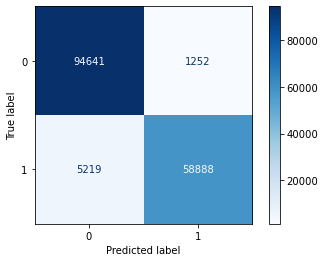

In [25]:
# Sum the arrays element-wise to get a single 2 by 2 array
cm = np.sum(conf_matrices, axis=0)

# Define the class labels as a list
class_labels = ['0', '1']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

In [273]:
false_positives = [arr[0,1:] for arr in conf_matrices]
sum_false_positives = sum(false_positives)
dollar_value_false_positives = sum_false_positives * 35
print("Sum of False Positives: " + str(sum_false_positives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_positives[0]))

false_negatives = [arr[1,:1] for arr in conf_matrices]
sum_false_negatives = sum(false_negatives)
dollar_value_false_negatives = sum_false_negatives * 15
print("Sum of False Negatives: " + str(sum_false_negatives[0]))
print("Dollar Value of False Positives: $" + str(dollar_value_false_negatives[0]))

Total= dollar_value_false_positives + dollar_value_false_negatives
print("Dollar Value of Incorrect Predictions: $" + str(Total[0]))

Sum of False Positives: 1252
Dollar Value of False Positives: $43820
Sum of False Negatives: 5219
Dollar Value of False Positives: $78285
Dollar Value of Incorrect Predictions: $122105
